In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Types of classification:

1. Binary classfication
2. Multiclass classification
3. Multilabel classfication

### Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
circles = pd.DataFrame({"XO":X[:,0], "X1":X[:,1],"label":y})
circles.head()

,XO,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


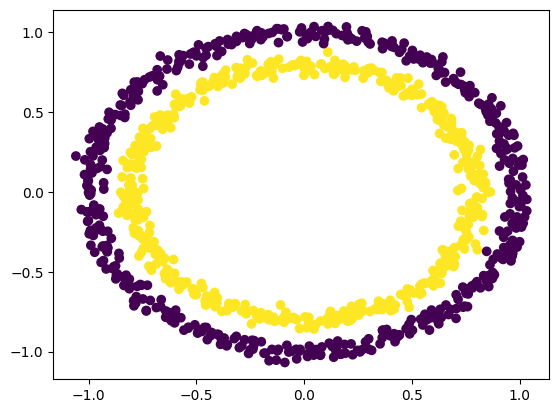

In [ ]:
# Visualize with plot
plt.scatter(X[:,0],X[:,1], c=y)

### Steps in modeling

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
tf.random.set_seed(42)
model_circle = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='relu')
])
model_circle.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                     optimizer=tf.keras.optimizers.SGD(),
                     metrics=['accuracy'])

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_circle.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 2s 8ms/step - loss: 6.2546 - accuracy: 0.4787
Epoch 2/100
25/25 [==============================] - 0s 8ms/step - loss: 5.2974 - accuracy: 0.4550
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 5.2261 - accuracy: 0.4538
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 5.0502 - accuracy: 0.4550
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 4.8483 - accuracy: 0.4638
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 4.5708 - accuracy: 0.4650
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 4.3702 - accuracy: 0.4675
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 3.6487 - accuracy: 0.4750
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 1.4211 - accuracy: 0.4900
Epoch 10/100
25/25 [==============================] - 0s 9ms/step - loss: 0.7439 - accuracy: 0.4863
Epoch 11/

In [ ]:
model_circle.evaluate(X_test,y_test)

7/7 [==============================] - 1s 8ms/step - loss: 0.6945 - accuracy: 0.4800


[0.6944702863693237, 0.47999998927116394]

In [ ]:
tf.random.set_seed(42)

model_circles_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_circles_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['accuracy'])
model_circles_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 2s 8ms/step - loss: 4.5518 - accuracy: 0.4863
Epoch 2/100
25/25 [==============================] - 0s 8ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
25/25 [==============================] - 0s 8ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [ ]:
model_circles_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [ ]:
tf.random.set_seed(42)

model_circles_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_circles_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['accuracy'])

model_circles_3.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 3.6691 - accuracy: 0.4638
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 1.2411 - accuracy: 0.4787
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7119 - accuracy: 0.5000
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7031 - accuracy: 0.5000
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.5000
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4675
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4913
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4888
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4812
Epoch 11/

In [ ]:
model_circles_3.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.4800


[0.6959813833236694, 0.47999998927116394]

### To visualize our model's prediction, we'll create a functino

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


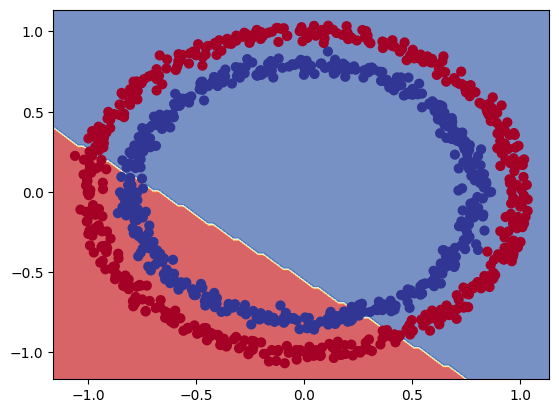

In [ ]:
# Check out the predictin our model is making
plot_decision_boundary(model_circles_3,X,y)

### The missing piece -> Non-linearity

In [ ]:
tf.random.set_seed(42)

model_circles_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation='relu')
])
model_circles_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(lr=0.01),
                        metrics=['accuracy'])

history = model_circles_4.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 4.3945 - accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 4.3259 - accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 4.2882 - accuracy: 0.5000
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 4.2387 - accuracy: 0.5000
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 4.1854 - accuracy: 0.5000
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 4.1200 - accuracy: 0.5000
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 4.0757 - accuracy: 0.5000
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 4.0024 - accuracy: 0.5000
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 3.9212 - accuracy: 0.5000
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 3.7393 - accuracy: 0.5000
Epoch 11/

In [ ]:
model_circles_4.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.8057 - accuracy: 0.5000


[0.8057032823562622, 0.5]

Increase the number of hidden layers and no of neurons

In [ ]:
tf.random.set_seed(42)

model_circles_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
])
model_circles_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(lr=0.01),
                        metrics=['accuracy'])

history = model_circles_5.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 5.4036 - accuracy: 0.2075
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 4.8650 - accuracy: 0.0838
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 4.5190 - accuracy: 0.1338
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 4.2311 - accuracy: 0.0512
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 3.9272 - accuracy: 0.1250
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 3.6182 - accuracy: 0.1312
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 3.2450 - accuracy: 0.1363
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 2.9185 - accuracy: 0.2375
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 2.8114 - accuracy: 0.2850
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 2.7667 - accuracy: 0.3100
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing multiclass classification...


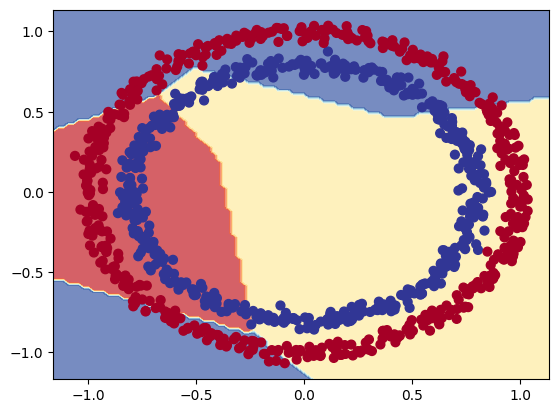

In [ ]:
plot_decision_boundary(model_circles_5,X,y)

In [ ]:
tf.random.set_seed(42)

model_circles_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_circles_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(lr=0.01),
                        metrics=['accuracy'])

history = model_circles_6.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7062 - accuracy: 0.4950
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7013 - accuracy: 0.4938
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.4950
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.4925
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5000
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.4963
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.4975
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5050
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.5150
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5275
Epoch 11/

In [ ]:
model_circles_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.5518 - accuracy: 0.7750


[0.5518487691879272, 0.7749999761581421]

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


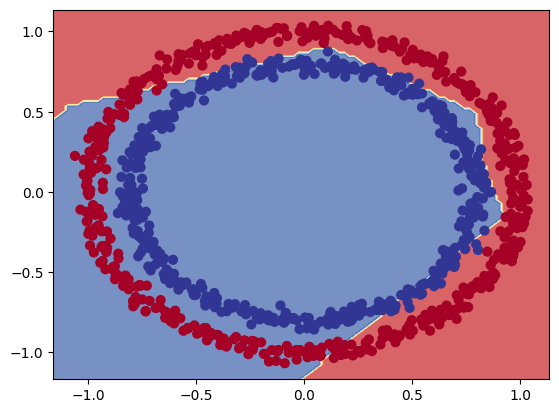

In [ ]:
plot_decision_boundary(model_circles_6, X, y)

Note: The combination of linear and non-linear functions is one of the key fundamentals of neural networks

In [ ]:
# Create a toy a tensor (similar to the data we pass into our models)

A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

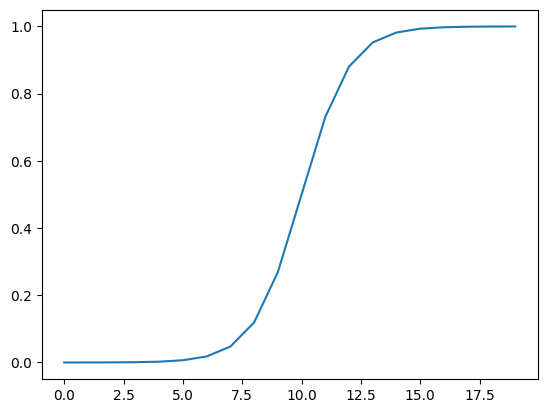

In [ ]:
# Let's start by replicating sigmoid - sigmoid(x) = 1/(1 + exp(-x))
def sigmoid(x):
  return 1/(1 + tf.exp(-x))

plt.plot(sigmoid(A))

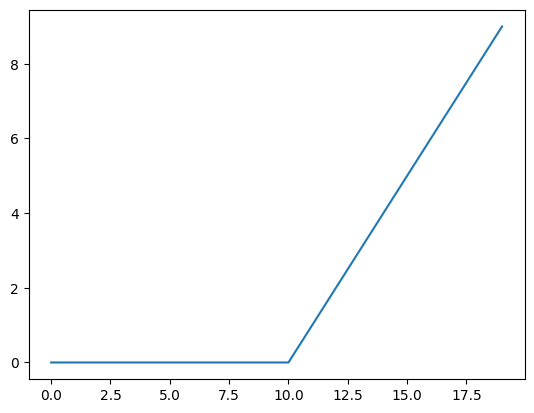

In [ ]:
# Let's create relu function
def relu(x):
  return tf.maximum(x,0)
plt.plot(relu(A))

### Evaluating and improving our classification


In [ ]:
len(X)

1000

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
tf.random.set_seed(42)

model_circles_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_circles_7.compile(loss="binary_crossentropy",
                        optimizer=tf.keras.optimizers.Adam(lr=0.01),
                        metrics=['accuracy'])

history = model_circles_7.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.4837
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.4900
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5138
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5063
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.4975
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5088
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5100
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5138
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5113
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5163
Epoch 11/25
25/25 [

In [ ]:
model_circles_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.4900


[0.6908640265464783, 0.49000000953674316]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


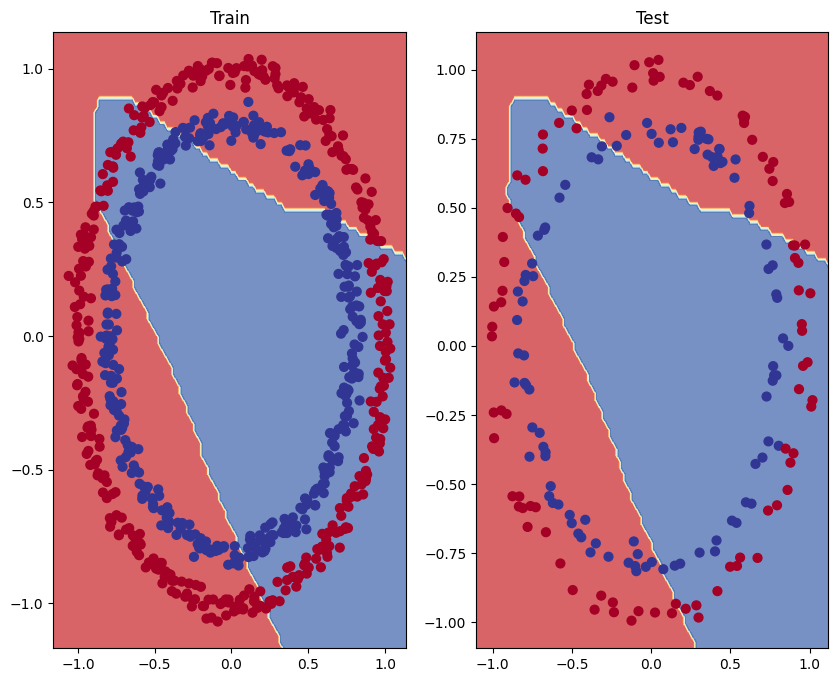

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_circles_7, X=X_train, y=y_train)

plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_circles_7, X=X_test, y=y_test)
plt.show()

### Plot the losses curves

In [ ]:
history.history

{'loss': [0.6928480267524719,
  0.6926524639129639,
  0.6923601627349854,
  0.6922484040260315,
  0.6920095086097717,
  0.6917703151702881,
  0.6915261149406433,
  0.6912989616394043,
  0.6911207437515259,
  0.6907989978790283,
  0.6904986500740051,
  0.690208375453949,
  0.6896989941596985,
  0.6893054246902466,
  0.6889051795005798,
  0.6883851885795593,
  0.6877614855766296,
  0.687247097492218,
  0.6867356896400452,
  0.6861340999603271,
  0.6853296160697937,
  0.684538722038269,
  0.683634877204895,
  0.6828129291534424,
  0.681628942489624],
 'accuracy': [0.48374998569488525,
  0.49000000953674316,
  0.5137500166893005,
  0.5062500238418579,
  0.4975000023841858,
  0.5087500214576721,
  0.5099999904632568,
  0.5137500166893005,
  0.5112500190734863,
  0.5162500143051147,
  0.5249999761581421,
  0.5237500071525574,
  0.5537499785423279,
  0.5762500166893005,
  0.5537499785423279,
  0.5612499713897705,
  0.5587499737739563,
  0.5612499713897705,
  0.5674999952316284,
  0.5525000095

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.692848,0.48375
1,0.692652,0.49000
2,0.692360,0.51375
3,0.692248,0.50625
4,0.692010,0.49750
5,0.691770,0.50875
6,0.691526,0.51000
7,0.691299,0.51375
8,0.691121,0.51125
9,0.690799,0.51625


Text(0.5, 1.0, 'Model 7 loss curve')

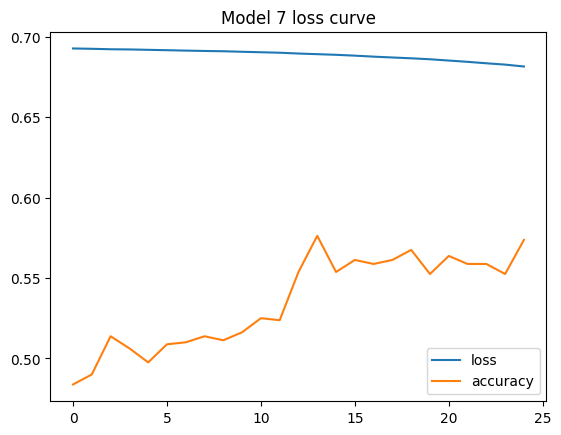

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model 7 loss curve")

### Finding the best learning rate
To find the ideal learning rate we're
going to use the following steps:

1. A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training.
2. Another model (we could use the same one as above but we're practicing building models here)
3. A modified loss curves plot.


In [ ]:
# Set random seed
tf.random.set_seed(42)

model_circles_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_circles_8.compile(loss='binary_crossentropy',
                        optimizer='Adam',
                        metrics=['accuracy'])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * 10**(epoch/20))

history_8 = model_circles_8.fit(X_train, y_train,
                                epochs=100,
                                callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.4888 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.4812 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.4950 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.4963 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4950 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.4938 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: xlabel='epochs'>

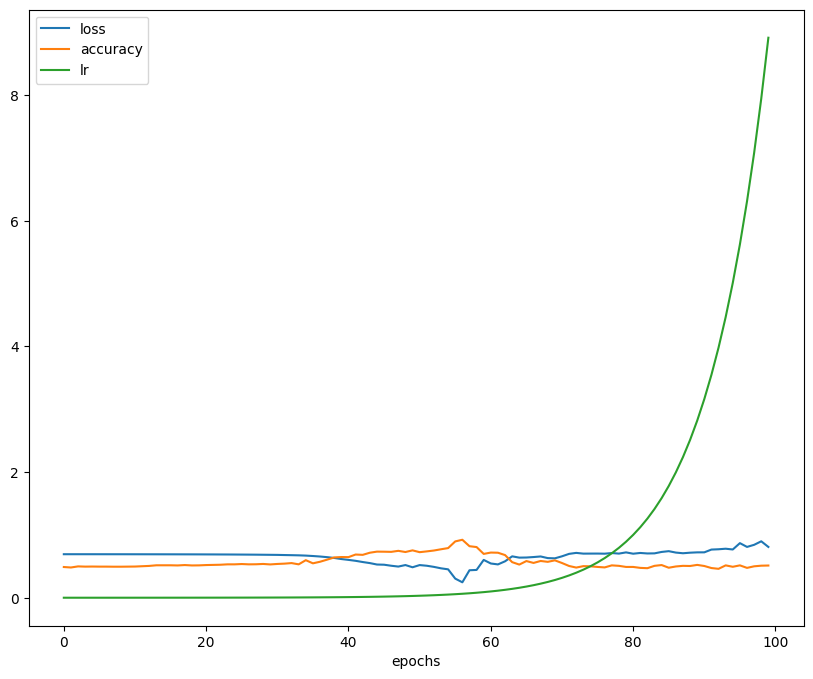

In [ ]:
pd.DataFrame(history_8.history).plot(figsize=(10,8), xlabel='epochs')

Text(0, 0.5, 'Loss')

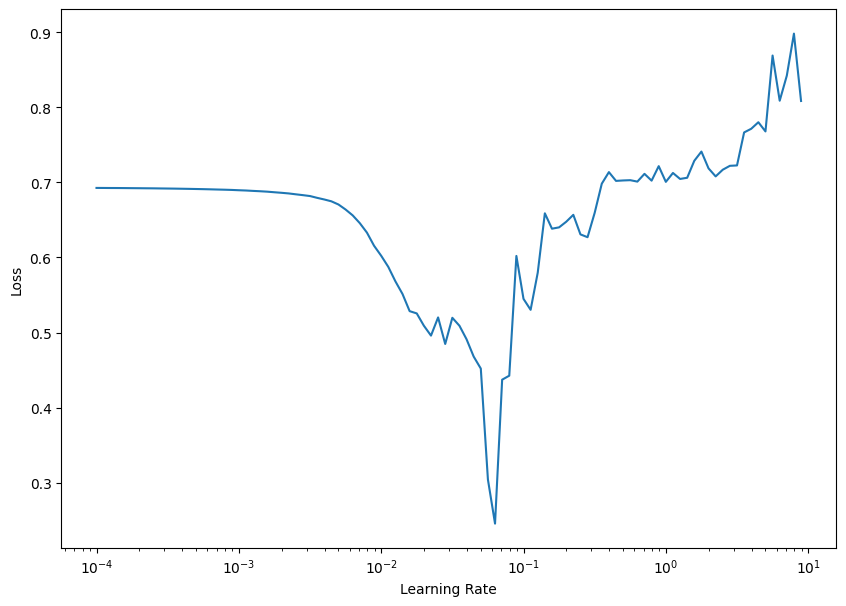

In [ ]:
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_8.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

In [ ]:
tf.random.set_seed(42)

model_circles_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_circles_9.compile(loss='binary_crossentropy',
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=['accuracy'])

history_9 = model_circles_9.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6980 - accuracy: 0.4725
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5088
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6820 - accuracy: 0.5337
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.6112
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.5512
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6523 - accuracy: 0.6275
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.6862
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6162 - accuracy: 0.6812
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5996 - accuracy: 0.7100
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5775 - accuracy: 0.7437
Epoch 11/25
25/25 [

In [ ]:
model_circles_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2617 - accuracy: 0.9100


[0.26173943281173706, 0.9100000262260437]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


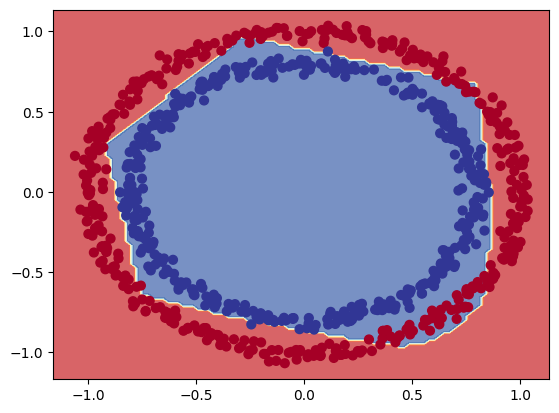

In [ ]:
plot_decision_boundary(model_circles_9,X_train,y_train)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


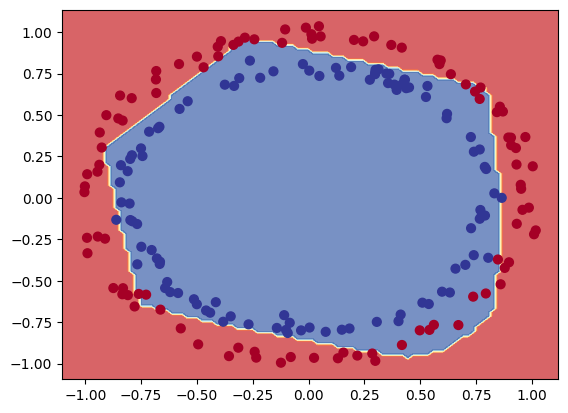

In [ ]:
plot_decision_boundary(model_circles_9, X=X_test, y=y_test)


### More classification evaluation matrices
1. Accuracy
2. Precision
3. Recall
4. F1-score
5. Confusion matrix
6. Classification report

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_circles_9.evaluate(X_test, y_test)
print("Model's loss - ",loss)
print("Model's accuracy - ",accuracy)

7/7 [==============================] - 0s 3ms/step - loss: 0.2617 - accuracy: 0.9100
Model's loss -  0.26173943281173706
Model's accuracy -  0.9100000262260437


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model_circles_9.predict(X_test)


y_pred = tf.round(y_pred)
confusion_matrix(y_test, y_pred)

7/7 [==============================] - 0s 2ms/step


array([[84, 16],
       [ 2, 98]])

How to make confusion matrix prettier

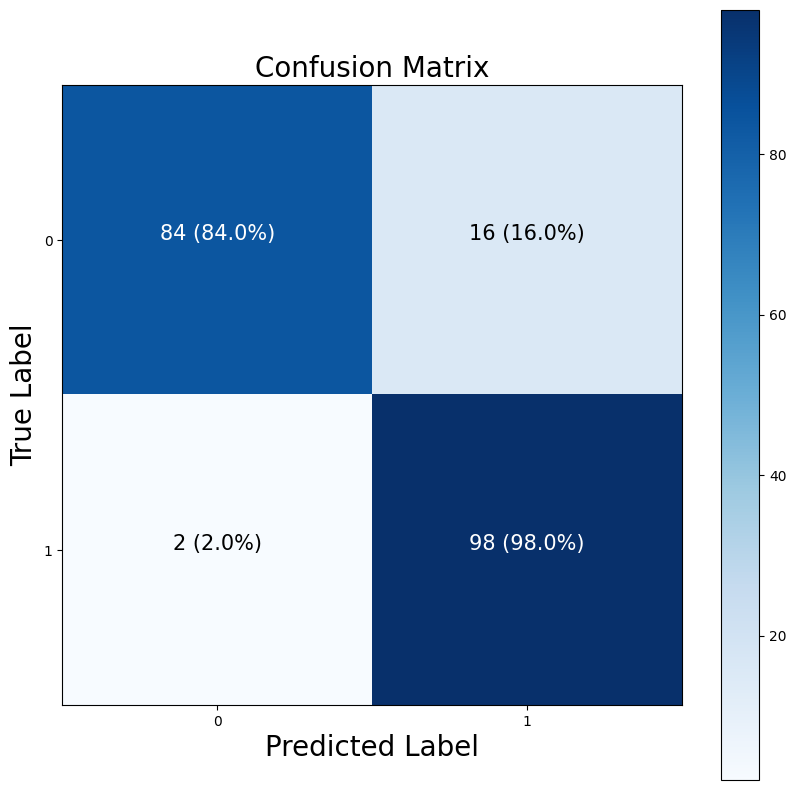

In [ ]:
import itertools

figsize = (10,10)

cm = confusion_matrix(y_test,y_pred)
cm_norm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False
if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title = "Confusion Matrix",
       xlabel = "Predicted Label",
       ylabel = "True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)
threshold = (cm.max() + cm.min())/2.0

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment='center',
           color='white' if cm[i, j] > threshold else 'black',
           size=15)

## Working with larger examples (Multiclass classification)
If you have more than 2 different classes, it's multiclass classification

In [ ]:
 import tensorflow as tf
 from tensorflow.keras.datasets import fashion_mnist

 # The data is already been sorted into training and test sets for us
 (train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [ ]:
train_labels[0]

9

In [ ]:
# Check the shape of a single example

train_data[0].shape, train_labels[0].shape

((28, 28), ())

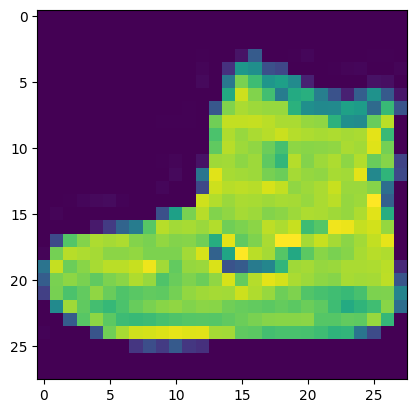

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

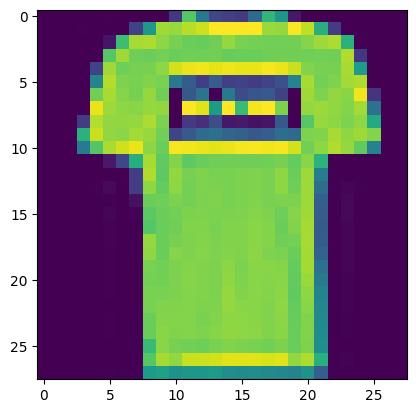

In [ ]:
plt.imshow(train_data[1]);

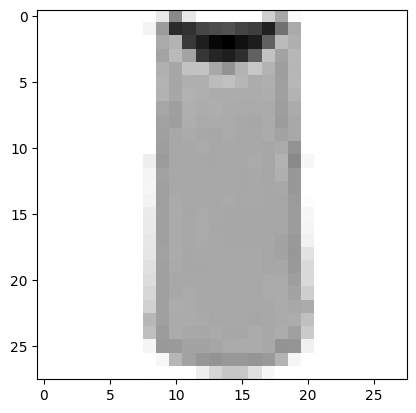

In [ ]:
plt.imshow(train_data[2], cmap=plt.cm.binary);

In [ ]:
class_names = 	["T-shirt/top","Trouser","Pullover",
                "Dress","Coat","Sandal","Shirt","Sneaker",
                "Bag", "Ankle boot"]

Text(0.5, 1.0, 'Ankle boot')

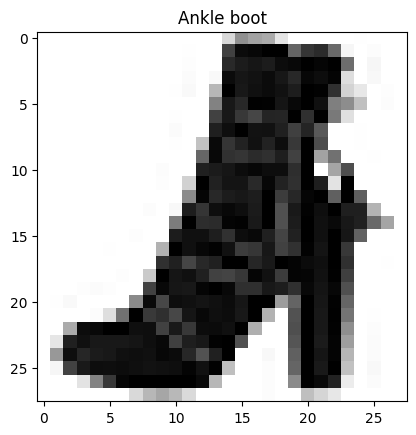

In [ ]:
# Pot an example image and label
index = 11
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

Text(0.5, 1.0, 'Dress')

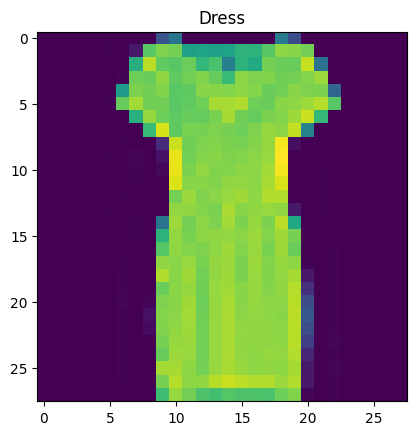

In [ ]:
index = 20
plt.imshow(train_data[index])
plt.title(class_names[train_labels[index]])

Text(0.5, 1.0, 'Bag')

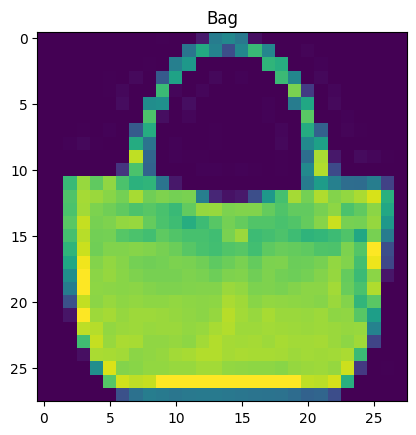

In [ ]:
index = 100
plt.imshow(train_data[index])
plt.title(class_names[train_labels[index]])

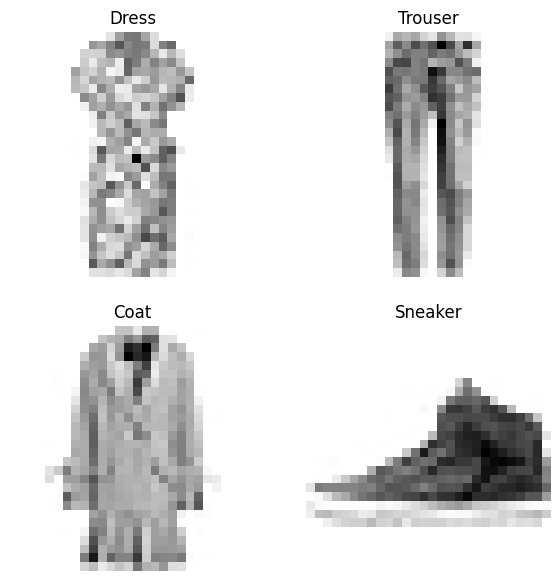

In [ ]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

### Building a mutliclass classfication model
For our multiclass classification model, we can use similar architecture to binary classification, there gonna be some differences:
1. Input shape - 28X28
2. Output shape - 10
3. Lose function -
     1. If your labels are one-hot encoded use tf.keras.losses.CategoricalCrossentropy()
     2. If you labels are in integer form, use SparseCategoricalCrossentropy()
4. Output layer activation - Softmax(not sigmoid)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 2.2183 - accuracy: 0.2319 - val_loss: 1.7392 - val_accuracy: 0.2897
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6926 - accuracy: 0.2839 - val_loss: 1.6713 - val_accuracy: 0.2666
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6253 - accuracy: 0.3143 - val_loss: 1.5985 - val_accuracy: 0.3369
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5957 - accuracy: 0.3236 - val_loss: 1.5853 - val_accuracy: 0.3340
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5749 - accuracy: 0.3302 - val_loss: 1.5766 - val_accuracy: 0.3277
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5575 - accuracy: 0.3359 - val_loss: 1.5402 - val_accuracy: 0.3439
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5463 - accuracy: 0.3451 - val_loss: 1.5327 - val_accuracy:

In [ ]:
model_11.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 4)                 3140      
                                                                 
 dense_23 (Dense)            (None, 4)                 20        
                                                                 
 dense_24 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

**Note** - Neural network prefer data in normalized form

In [ ]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

Now our data is between 0 and 1. Let's see what happens when we model it.

We'll use the same model as before (model_11) except this time the data will be normalized

In [ ]:
# set the random seed
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
norm_history = model_12.fit(train_data, train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.5424 - accuracy: 0.3919 - val_loss: 1.3063 - val_accuracy: 0.4497
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2696 - accuracy: 0.4518 - val_loss: 1.2487 - val_accuracy: 0.4532
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2334 - accuracy: 0.4638 - val_loss: 1.2152 - val_accuracy: 0.4932
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0753 - accuracy: 0.5521 - val_loss: 1.0064 - val_accuracy: 0.5836
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9558 - accuracy: 0.6115 - val_loss: 0.9289 - val_accuracy: 0.6416
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8929 - accuracy: 0.6370 - val_loss: 0.9029 - val_accuracy: 0.6541
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8454 - accuracy: 0.6618 - val_loss: 0.8456 - val_accuracy:

<Axes: title={'center': 'Normalized data'}>

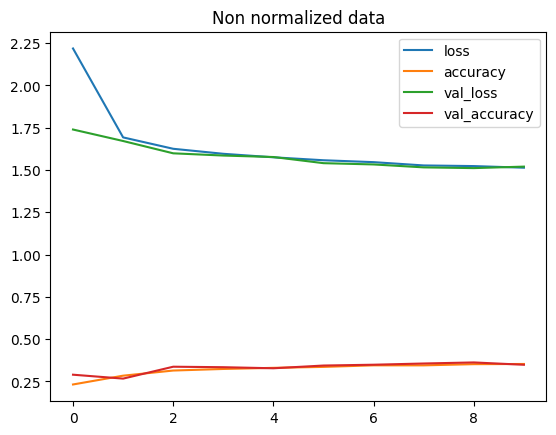

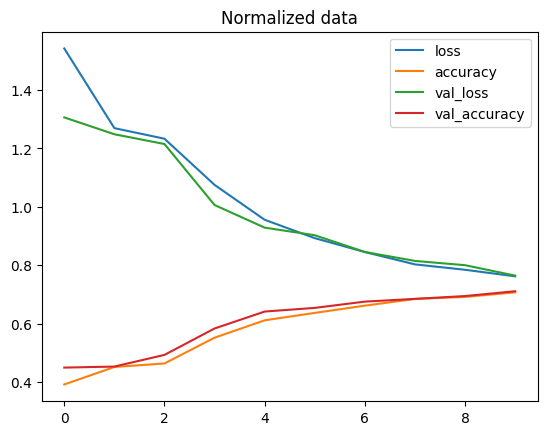

In [ ]:
import pandas as pd

# Plot non-normalized data
pd.DataFrame(non_norm_history.history).plot(title='Non normalized data')

# Plot normalized data
pd.DataFrame(norm_history.history).plot(title='Normalized data')

**Note** -> The same model with slightly different data can produced dramatically different results

### Finding the learning rate

In [ ]:
# set the random seed
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 * 10**(epoch/20))
norm_history = model_13.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3039 - accuracy: 0.1013 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3040 - accuracy: 0.0975 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3040 - accuracy: 0.0993 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3040 - accuracy: 0.0998 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3039 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3039 - accuracy: 0.1002 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3040 - accuracy: 0.0978 - val_loss: 2.3031 - val_accuracy:

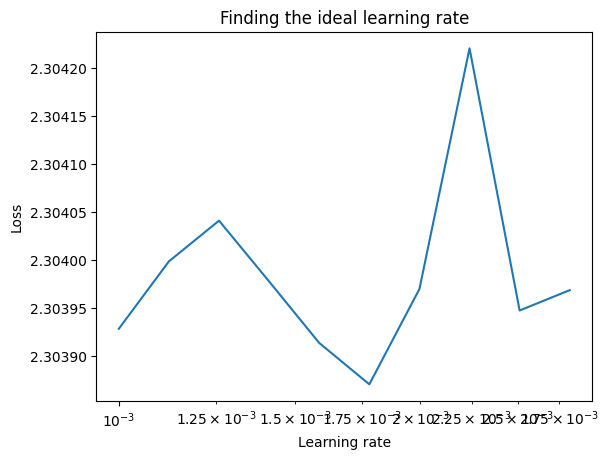

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(10)/20))
plt.semilogx(lrs, norm_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:
# ideal Learning rate = 1e-3

In [ ]:
# set the random seed
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

norm_history = model_14.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0800 - accuracy: 0.6299 - val_loss: 0.6910 - val_accuracy: 0.7789
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6181 - accuracy: 0.7946 - val_loss: 0.6125 - val_accuracy: 0.7944
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5702 - accuracy: 0.8058 - val_loss: 0.5902 - val_accuracy: 0.7983
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5498 - accuracy: 0.8116 - val_loss: 0.5790 - val_accuracy: 0.8028
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5378 - accuracy: 0.8127 - val_loss: 0.5655 - val_accuracy: 0.8046
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5278 - accuracy: 0.8175 - val_loss: 0.5682 - val_accuracy: 0.8043
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5205 - accuracy: 0.8191 - val_loss: 0.5758 - val_accuracy:

### Evaluating the multiclass classification model
To evaluate our model We could:

1. Evaluate its performance using other classification metrics (such as a confusion matrix or classification report).
2. Assess some of its predictions (through visualizations).
3. Improve its accuracy (by training it for longer or changing the architecture).
4. Save and export it for use in an application

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()
  threshold = (cm.max() + cm.min()) / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
y_probs = model_14.predict(test_data) # probs is short for prediction probabilities
y_probs

313/313 [==============================] - 1s 2ms/step


array([[5.22669408e-12, 6.72460785e-13, 8.66611005e-10, ...,
        4.74924967e-02, 4.47084720e-04, 5.63372076e-01],
       [4.47584243e-05, 5.26876647e-06, 9.62891698e-01, ...,
        1.87700434e-31, 1.13848220e-09, 1.01806122e-21],
       [2.18442313e-08, 9.99707222e-01, 9.77991658e-05, ...,
        1.62843727e-14, 2.58903073e-11, 5.81845200e-07],
       ...,
       [1.10198714e-01, 3.24250848e-08, 1.20143848e-03, ...,
        2.22675475e-10, 7.02516317e-01, 2.94150091e-08],
       [4.01255527e-08, 9.99577940e-01, 1.77646973e-04, ...,
        9.32072175e-15, 4.37987320e-11, 3.50295011e-07],
       [8.43411812e-08, 3.10453330e-11, 1.76888989e-07, ...,
        4.84960899e-03, 8.81670509e-03, 1.95397227e-03]], dtype=float32)

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [ ]:
y_preds = y_probs.argmax(axis=1)

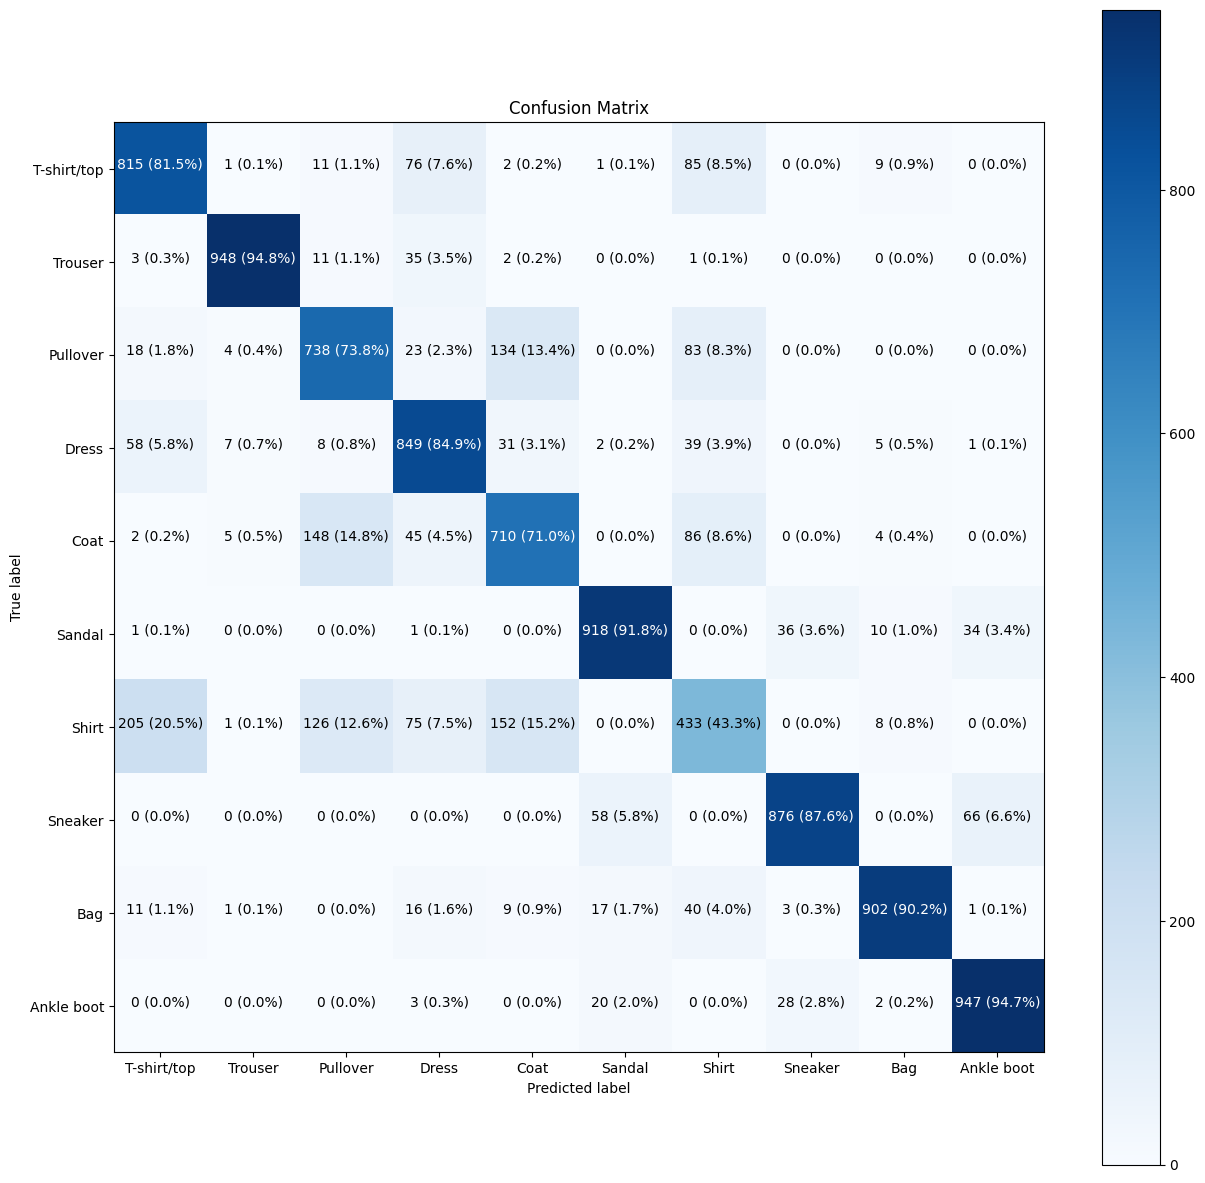

In [ ]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plot it and labels it with prediction and true label.
  """

  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending upon if the predictions is right or wrong
  if pred_label ==  true_label:
    color = 'green'
  else:
    color = 'red'

  # Add xlabel imformation
  plt.xlabel("Pred : {} {:2.0f}% (True : {})".format(pred_label,
                                                     100*tf.reduce_max(pred_probs),
                                                     true_label),
             color=color)




1/1 [==============================] - 0s 26ms/step


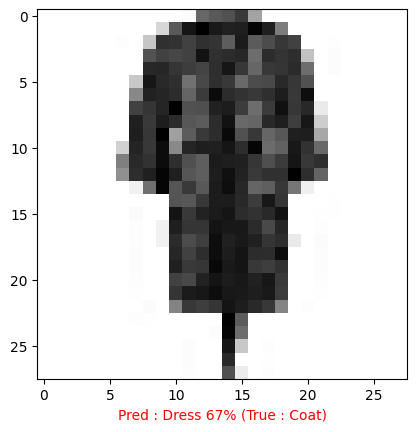

In [ ]:
# Check out random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

### What patterns is our model learning?

In [ ]:
model_14.layers

In [ ]:
model_14.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

weights, weights.shape


(array([[ 0.2507666 , -0.19318393, -0.14968993, -0.26607177],
        [-0.07542151, -0.2339986 , -0.39213088,  0.2899573 ],
        [-0.45115465, -0.5566424 ,  0.46696487,  0.2796024 ],
        ...,
        [-0.05208324, -0.20468333,  0.19407511,  0.41641787],
        [ 0.1486793 , -0.19515535, -0.03322744,  0.30139568],
        [ 0.29391265, -0.37772316, -0.11409429,  0.19510621]],
       dtype=float32),
 (784, 4))

In [ ]:
biases, biases.shape

(array([0.13615282, 0.9001168 , 0.7575666 , 0.26052606], dtype=float32), (4,))

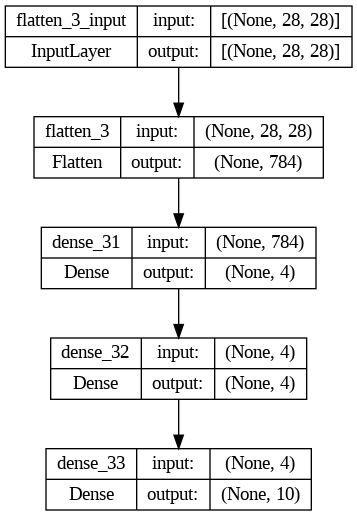

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_14, show_shapes=True)